# Wrangling Project - WeRateDogs

***WeRateDogs*** ([@dog_rates](https://twitter.com/dog_rates)) is a Twitter account with more than 7 million followers. As its name implies, WeRateDogs receives dog pictures and rates them, usually with funny comments. Its profile description is "Your Only Source For Professional Dog Ratings".

Using a neural network algorithm, *Udacity* classified the dog breeds in the photos of WeRateDogs. Those results can be used to extract valuable insights.

The main focus of this project is on **Data Wrangling**, and the following processes will be described:
- Gathering Data
- Assessing Data
- Cleaning Data
- Analysis and Visualization

## Gathering Data

Data from three different sources have to be gathered. The first source is a .csv file containing a preliminary data extracted from WeRateDogs tweets. The second source contains neural network analysis of dog breeds from images and is available online as a .tsv file. The third source is Twitter API, from which additional data will be retrieved.

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt

In [2]:
archive = pd.read_csv("twitter-archive-enhanced.csv")

archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


The <u>second</u> piece of data is available online, and we are going to download it programmatically using the *requests* module.

In [3]:
# Running this cell will download and WRITE on image-predictions.tsv
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open("image_predictions.tsv", mode="wb") as file:
    file.write(response.content)

In [4]:
img_pred = pd.read_csv("image_predictions.tsv", sep="\t")

img_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


Finally, the last piece of information is the number of retweets and favorites for each tweet referenced in the "twitter-archive-enhanced" file.

To obtain this data, we'll use tweepy module to communicate with the Twitter API. The first step is get authorization and create an api object from which we access the desired information. Because Twitter puts limits on number of requests, and we'll gather data from thousands of tweets, `wait_on_rate_limit` and `wait_on_rate_limit_notify` are set to `True` for best behavior.

In [ ]:
"""# SUBSTITUTE X WITH THE CORRECT INFORMATION
consumer_key = 'X'
consumer_secret = 'X'
access_token = 'X'
access_secret = 'X'"""

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

After this initial setup: **1.** Tweet information is accessed through `get_status()` method; **2.** The tweet JSON data is written to "tweet_json.txt" file using `dump()` (from json module); **3.** This will be repeated for every tweet_id contained in the "archive" dataframe.

The cell below takes several minutes to run. In order to visualize the status during execution, print statements are added to the code.

In [49]:
# ATTENTION: running this cell will WRITE tweet data to a tweet_json.txt file
with open("tweet_json.txt", mode="w") as file:
    for tweet_id in archive.tweet_id.astype(str):
        try:
            print("Fetching status for tweet_id", tweet_id)
            tweet = api.get_status(tweet_id, tweet_mode="extended") #"extended" avoids truncation
            json.dump(tweet._json, file)
            file.write("\n")    # so that each tweet json data is in a different line
        except:
            print("Failed")

Fetching status for tweet_id 892420643555336193
Fetching status for tweet_id 892177421306343426
Fetching status for tweet_id 891815181378084864
Fetching status for tweet_id 891689557279858688
Fetching status for tweet_id 891327558926688256
Fetching status for tweet_id 891087950875897856
Fetching status for tweet_id 890971913173991426
Fetching status for tweet_id 890729181411237888
Fetching status for tweet_id 890609185150312448
Fetching status for tweet_id 890240255349198849
Fetching status for tweet_id 890006608113172480
Fetching status for tweet_id 889880896479866881
Fetching status for tweet_id 889665388333682689
Fetching status for tweet_id 889638837579907072
Fetching status for tweet_id 889531135344209921
Fetching status for tweet_id 889278841981685760
Fetching status for tweet_id 888917238123831296
Fetching status for tweet_id 888804989199671297
Fetching status for tweet_id 888554962724278272
Fetching status for tweet_id 888202515573088257
Failed
Fetching status for tweet_id 8880

Fetching status for tweet_id 859074603037188101
Fetching status for tweet_id 858860390427611136
Fetching status for tweet_id 858843525470990336
Fetching status for tweet_id 858471635011153920
Fetching status for tweet_id 858107933456039936
Fetching status for tweet_id 857989990357356544
Fetching status for tweet_id 857746408056729600
Fetching status for tweet_id 857393404942143489
Fetching status for tweet_id 857263160327368704
Fetching status for tweet_id 857214891891077121
Fetching status for tweet_id 857062103051644929
Fetching status for tweet_id 857029823797047296
Fetching status for tweet_id 856602993587888130
Fetching status for tweet_id 856543823941562368
Fetching status for tweet_id 856526610513747968
Fetching status for tweet_id 856330835276025856
Fetching status for tweet_id 856288084350160898
Fetching status for tweet_id 856282028240666624
Fetching status for tweet_id 855862651834028034
Fetching status for tweet_id 855860136149123072
Fetching status for tweet_id 85585769852

Fetching status for tweet_id 832215726631055365
Fetching status for tweet_id 832088576586297345
Fetching status for tweet_id 832040443403784192
Fetching status for tweet_id 832032802820481025
Fetching status for tweet_id 831939777352105988
Fetching status for tweet_id 831926988323639298
Fetching status for tweet_id 831911600680497154
Fetching status for tweet_id 831670449226514432
Fetching status for tweet_id 831650051525054464
Fetching status for tweet_id 831552930092285952
Fetching status for tweet_id 831322785565769729
Fetching status for tweet_id 831315979191906304
Fetching status for tweet_id 831309418084069378
Fetching status for tweet_id 831262627380748289
Fetching status for tweet_id 830956169170665475
Fetching status for tweet_id 830583320585068544
Fetching status for tweet_id 830173239259324417
Fetching status for tweet_id 830097400375152640
Fetching status for tweet_id 829878982036299777
Fetching status for tweet_id 829861396166877184
Fetching status for tweet_id 82950199519

Fetching status for tweet_id 811744202451197953
Fetching status for tweet_id 811647686436880384
Fetching status for tweet_id 811627233043480576
Fetching status for tweet_id 811386762094317568
Fetching status for tweet_id 810984652412424192
Fetching status for tweet_id 810896069567610880
Fetching status for tweet_id 810657578271330305
Fetching status for tweet_id 810284430598270976
Fetching status for tweet_id 810254108431155201
Fetching status for tweet_id 809920764300447744
Fetching status for tweet_id 809808892968534016
Fetching status for tweet_id 809448704142938112
Fetching status for tweet_id 809220051211603969
Fetching status for tweet_id 809084759137812480
Fetching status for tweet_id 808838249661788160
Fetching status for tweet_id 808733504066486276
Fetching status for tweet_id 808501579447930884
Fetching status for tweet_id 808344865868283904
Fetching status for tweet_id 808134635716833280
Fetching status for tweet_id 808106460588765185
Fetching status for tweet_id 80800131216

Fetching status for tweet_id 788412144018661376
Fetching status for tweet_id 788178268662984705
Fetching status for tweet_id 788150585577050112
Fetching status for tweet_id 788070120937619456
Fetching status for tweet_id 788039637453406209
Fetching status for tweet_id 787810552592695296
Fetching status for tweet_id 787717603741622272
Fetching status for tweet_id 787397959788929025
Fetching status for tweet_id 787322443945877504
Fetching status for tweet_id 787111942498508800
Fetching status for tweet_id 786963064373534720
Fetching status for tweet_id 786729988674449408
Fetching status for tweet_id 786709082849828864
Fetching status for tweet_id 786664955043049472
Fetching status for tweet_id 786595970293370880
Fetching status for tweet_id 786363235746385920
Fetching status for tweet_id 786286427768250368
Fetching status for tweet_id 786233965241827333
Fetching status for tweet_id 786051337297522688
Fetching status for tweet_id 786036967502913536
Fetching status for tweet_id 78592781917

Fetching status for tweet_id 765222098633691136
Fetching status for tweet_id 764857477905154048
Fetching status for tweet_id 764259802650378240
Fetching status for tweet_id 763956972077010945
Fetching status for tweet_id 763837565564780549
Fetching status for tweet_id 763183847194451968
Fetching status for tweet_id 763167063695355904
Fetching status for tweet_id 763103485927849985
Fetching status for tweet_id 762699858130116608
Fetching status for tweet_id 762471784394268675
Fetching status for tweet_id 762464539388485633
Fetching status for tweet_id 762316489655476224
Fetching status for tweet_id 762035686371364864
Fetching status for tweet_id 761976711479193600
Fetching status for tweet_id 761750502866649088
Fetching status for tweet_id 761745352076779520
Fetching status for tweet_id 761672994376806400
Fetching status for tweet_id 761599872357261312
Fetching status for tweet_id 761371037149827077
Fetching status for tweet_id 761334018830917632
Fetching status for tweet_id 76129294774

Rate limit reached. Sleeping for: 568


Fetching status for tweet_id 758467244762497024
Fetching status for tweet_id 758405701903519748
Fetching status for tweet_id 758355060040593408
Fetching status for tweet_id 758099635764359168
Fetching status for tweet_id 758041019896193024
Fetching status for tweet_id 757741869644341248
Fetching status for tweet_id 757729163776290825
Fetching status for tweet_id 757725642876129280
Fetching status for tweet_id 757611664640446465
Fetching status for tweet_id 757597904299253760
Fetching status for tweet_id 757596066325864448
Fetching status for tweet_id 757400162377592832
Fetching status for tweet_id 757393109802180609
Fetching status for tweet_id 757354760399941633
Fetching status for tweet_id 756998049151549440
Fetching status for tweet_id 756939218950160384
Fetching status for tweet_id 756651752796094464
Fetching status for tweet_id 756526248105566208
Fetching status for tweet_id 756303284449767430
Fetching status for tweet_id 756288534030475264
Fetching status for tweet_id 75627583362

Fetching status for tweet_id 739932936087216128
Fetching status for tweet_id 739844404073074688
Fetching status for tweet_id 739623569819336705
Fetching status for tweet_id 739606147276148736
Fetching status for tweet_id 739544079319588864
Fetching status for tweet_id 739485634323156992
Fetching status for tweet_id 739238157791694849
Fetching status for tweet_id 738891149612572673
Fetching status for tweet_id 738885046782832640
Fetching status for tweet_id 738883359779196928
Fetching status for tweet_id 738537504001953792
Fetching status for tweet_id 738402415918125056
Fetching status for tweet_id 738184450748633089
Fetching status for tweet_id 738166403467907072
Fetching status for tweet_id 738156290900254721
Fetching status for tweet_id 737826014890496000
Fetching status for tweet_id 737800304142471168
Fetching status for tweet_id 737678689543020544
Fetching status for tweet_id 737445876994609152
Fetching status for tweet_id 737322739594330112
Fetching status for tweet_id 73731073755

Fetching status for tweet_id 711743778164514816
Fetching status for tweet_id 711732680602345472
Fetching status for tweet_id 711694788429553666
Fetching status for tweet_id 711652651650457602
Fetching status for tweet_id 711363825979756544
Fetching status for tweet_id 711306686208872448
Fetching status for tweet_id 711008018775851008
Fetching status for tweet_id 710997087345876993
Fetching status for tweet_id 710844581445812225
Fetching status for tweet_id 710833117892898816
Fetching status for tweet_id 710658690886586372
Fetching status for tweet_id 710609963652087808
Fetching status for tweet_id 710588934686908417
Fetching status for tweet_id 710296729921429505
Fetching status for tweet_id 710283270106132480
Fetching status for tweet_id 710272297844797440
Fetching status for tweet_id 710269109699739648
Fetching status for tweet_id 710153181850935296
Fetching status for tweet_id 710140971284037632
Fetching status for tweet_id 710117014656950272
Fetching status for tweet_id 70991879888

Fetching status for tweet_id 698703483621523456
Fetching status for tweet_id 698635131305795584
Fetching status for tweet_id 698549713696649216
Fetching status for tweet_id 698355670425473025
Fetching status for tweet_id 698342080612007937
Fetching status for tweet_id 698262614669991936
Fetching status for tweet_id 698195409219559425
Fetching status for tweet_id 698178924120031232
Fetching status for tweet_id 697995514407682048
Fetching status for tweet_id 697990423684476929
Fetching status for tweet_id 697943111201378304
Fetching status for tweet_id 697881462549430272
Fetching status for tweet_id 697630435728322560
Fetching status for tweet_id 697616773278015490
Fetching status for tweet_id 697596423848730625
Fetching status for tweet_id 697575480820686848
Fetching status for tweet_id 697516214579523584
Fetching status for tweet_id 697482927769255936
Fetching status for tweet_id 697463031882764288
Fetching status for tweet_id 697270446429966336
Fetching status for tweet_id 69725937823

Fetching status for tweet_id 686760001961103360
Fetching status for tweet_id 686749460672679938
Fetching status for tweet_id 686730991906516992
Fetching status for tweet_id 686683045143953408
Fetching status for tweet_id 686618349602762752
Fetching status for tweet_id 686606069955735556
Fetching status for tweet_id 686394059078897668
Fetching status for tweet_id 686386521809772549
Fetching status for tweet_id 686377065986265092
Fetching status for tweet_id 686358356425093120
Fetching status for tweet_id 686286779679375361
Fetching status for tweet_id 686050296934563840
Fetching status for tweet_id 686035780142297088
Fetching status for tweet_id 686034024800862208
Fetching status for tweet_id 686007916130873345
Fetching status for tweet_id 686003207160610816
Fetching status for tweet_id 685973236358713344
Fetching status for tweet_id 685943807276412928
Fetching status for tweet_id 685906723014619143
Fetching status for tweet_id 685681090388975616
Fetching status for tweet_id 68566737919

Fetching status for tweet_id 678764513869611008
Fetching status for tweet_id 678755239630127104
Fetching status for tweet_id 678740035362037760
Fetching status for tweet_id 678708137298427904
Fetching status for tweet_id 678675843183484930
Fetching status for tweet_id 678643457146150913
Fetching status for tweet_id 678446151570427904
Fetching status for tweet_id 678424312106393600
Fetching status for tweet_id 678410210315247616
Fetching status for tweet_id 678399652199309312
Fetching status for tweet_id 678396796259975168
Fetching status for tweet_id 678389028614488064
Fetching status for tweet_id 678380236862578688
Fetching status for tweet_id 678341075375947776
Fetching status for tweet_id 678334497360859136
Fetching status for tweet_id 678278586130948096
Fetching status for tweet_id 678255464182861824
Fetching status for tweet_id 678023323247357953
Fetching status for tweet_id 678021115718029313
Fetching status for tweet_id 677961670166224897
Fetching status for tweet_id 67791853151

Rate limit reached. Sleeping for: 534


Fetching status for tweet_id 676949632774234114
Fetching status for tweet_id 676948236477857792
Fetching status for tweet_id 676946864479084545
Fetching status for tweet_id 676942428000112642
Fetching status for tweet_id 676936541936185344
Fetching status for tweet_id 676916996760600576
Fetching status for tweet_id 676897532954456065
Fetching status for tweet_id 676864501615042560
Fetching status for tweet_id 676821958043033607
Fetching status for tweet_id 676819651066732545
Fetching status for tweet_id 676811746707918848
Fetching status for tweet_id 676776431406465024
Fetching status for tweet_id 676617503762681856
Fetching status for tweet_id 676613908052996102
Fetching status for tweet_id 676606785097199616
Fetching status for tweet_id 676603393314578432
Fetching status for tweet_id 676593408224403456
Fetching status for tweet_id 676590572941893632
Fetching status for tweet_id 676588346097852417
Fetching status for tweet_id 676582956622721024
Fetching status for tweet_id 67657550197

Fetching status for tweet_id 673213039743795200
Fetching status for tweet_id 673148804208660480
Fetching status for tweet_id 672997845381865473
Fetching status for tweet_id 672995267319328768
Fetching status for tweet_id 672988786805112832
Fetching status for tweet_id 672984142909456390
Fetching status for tweet_id 672980819271634944
Fetching status for tweet_id 672975131468300288
Fetching status for tweet_id 672970152493887488
Fetching status for tweet_id 672968025906282496
Fetching status for tweet_id 672964561327235073
Fetching status for tweet_id 672902681409806336
Fetching status for tweet_id 672898206762672129
Fetching status for tweet_id 672884426393653248
Fetching status for tweet_id 672877615439593473
Fetching status for tweet_id 672834301050937345
Fetching status for tweet_id 672828477930868736
Fetching status for tweet_id 672640509974827008
Fetching status for tweet_id 672622327801233409
Fetching status for tweet_id 672614745925664768
Fetching status for tweet_id 67260915293

Fetching status for tweet_id 669942763794931712
Fetching status for tweet_id 669926384437997569
Fetching status for tweet_id 669923323644657664
Fetching status for tweet_id 669753178989142016
Fetching status for tweet_id 669749430875258880
Fetching status for tweet_id 669684865554620416
Fetching status for tweet_id 669683899023405056
Fetching status for tweet_id 669682095984410625
Fetching status for tweet_id 669680153564442624
Fetching status for tweet_id 669661792646373376
Fetching status for tweet_id 669625907762618368
Fetching status for tweet_id 669603084620980224
Fetching status for tweet_id 669597912108789760
Fetching status for tweet_id 669583744538451968
Fetching status for tweet_id 669573570759163904
Fetching status for tweet_id 669571471778410496
Fetching status for tweet_id 669567591774625800
Fetching status for tweet_id 669564461267722241
Fetching status for tweet_id 669393256313184256
Fetching status for tweet_id 669375718304980992
Fetching status for tweet_id 66937148379

Fetching status for tweet_id 666691418707132416
Fetching status for tweet_id 666649482315059201
Fetching status for tweet_id 666644823164719104
Fetching status for tweet_id 666454714377183233
Fetching status for tweet_id 666447344410484738
Fetching status for tweet_id 666437273139982337
Fetching status for tweet_id 666435652385423360
Fetching status for tweet_id 666430724426358785
Fetching status for tweet_id 666428276349472768
Fetching status for tweet_id 666421158376562688
Fetching status for tweet_id 666418789513326592
Fetching status for tweet_id 666411507551481857
Fetching status for tweet_id 666407126856765440
Fetching status for tweet_id 666396247373291520
Fetching status for tweet_id 666373753744588802
Fetching status for tweet_id 666362758909284353
Fetching status for tweet_id 666353288456101888
Fetching status for tweet_id 666345417576210432
Fetching status for tweet_id 666337882303524864
Fetching status for tweet_id 666293911632134144
Fetching status for tweet_id 66628740622

At this point, "tweet_json.txt" contains the JSON data for every specified tweet (if the access was succesful). The final step is reading this file to create a pandas dataframe, and to select the desired information.

We may create a dataframe from a dictionary of lists, but also from a *list of dictionaries* (dictionary keys as columns). We then create an empty list and append to it each of the JSON data (python dictionaries). `loads()` from *json* module is used to correctly interpret the .txt file.

We are only interested in the tweets' "id", "retweet_count" and "favorite_count"

In [5]:
with open("tweet_json.txt") as file:
    listofdicts = []
    for line in file:
        tweet = json.loads(line)
        listofdicts.append(tweet)
    dfjson = pd.DataFrame(listofdicts, columns=["id", "retweet_count", "favorite_count"])

dfjson.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8326,38067
1,892177421306343426,6151,32673
2,891815181378084864,4069,24588


## Assessing Data

We gathered data from three different sources and loaded them in the following pandas dataframes:
- archive
- img_pred
- dfjson

We must now *assess* them for **quality** and **tidiness** problems.

### Assessing the "archive" dataframe

In [6]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


From the initial visual inspection, `.info()` and `.describe()`, one can observe that there is information on 2356 tweets, the column names are descriptive enough, numeric values are valid.

The following issues are identified: 
- timestamp type (string/object) is not *datetime*;
- The "None" values are not identified as *null* values;
- Values for "source" column contain html flags, thus are not well represented;
- Columns "doggo" through "puppo" may be collapsed into one categorical variable representing dog stage;
- Dataframe contains data for retweets (we are only interested in non-retweets).

In [9]:
archive.sort_values("rating_denominator").head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
1576,687460506001633280,NaN,NaN,2016-01-14 02:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kramer. He's a Picasso Tortellini. Tie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687460506...,10,10,Kramer,None,None,None,None


In [10]:
archive.sort_values("rating_denominator", ascending=False).head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


Issues identified when sorting by "rating_denominator", which contained suspicious values:
- No photo nor rating for tweet_id 835246439529840640;
- Incorrect rating for tweet_id 666287406224695296: it is 1/2 when it should be 9/10;
- Incorrect rating for tweet_id 810984652412424192: it is 24/7 when it doesn't have a rating.

In [11]:
archive.sort_values("name", ascending=False)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
773,776249906839351296,NaN,NaN,2016-09-15 02:42:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. Pls stop sen...,7.007478e+17,4.196984e+09,2016-02-19 18:24:26 +0000,https://twitter.com/dog_rates/status/700747788...,11,10,very,None,None,None,None
1031,745422732645535745,NaN,NaN,2016-06-22 01:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745422732...,9,10,very,None,None,None,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142...,11,10,very,None,None,None,None
1097,736225175608430592,NaN,NaN,2016-05-27 15:58:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736225175...,10,10,very,None,None,None,None
1385,700747788515020802,NaN,NaN,2016-02-19 18:24:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700747788...,11,10,very,None,None,None,None
1121,730924654643314689,NaN,NaN,2016-05-13 00:56:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending non-canine...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730924654...,9,10,unacceptable,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
1797,677269281705472000,NaN,NaN,2015-12-16 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest pupper I've ever seen. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677269281...,10,10,the,None,None,pupper,None


Dog names: Through detailed visual inspection, and with help of descending sorted names (above), we observe that all values starting with a lowercase character in the "names" column are not correct. Thus we have a final issue:
- Values with starting lowercase character in "names" column are incorrect.

### Assessing the "img_pred" dataframe

In [12]:
img_pred.sample(19)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1485,781661882474196992,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,1,Pembroke,0.438087,True,golden_retriever,0.226954,True,collie,0.070652,True
2019,880465832366813184,https://pbs.twimg.com/media/DDgK-J4XUAIEV9W.jpg,1,golden_retriever,0.913255,True,Labrador_retriever,0.026329,True,cocker_spaniel,0.009371,True
1503,784826020293709826,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True
411,673906403526995968,https://pbs.twimg.com/media/CVoySqoWUAAWb7N.jpg,1,toilet_seat,0.683319,False,soft-coated_wheaten_terrier,0.048928,True,Siberian_husky,0.030386,True
515,676263575653122048,https://pbs.twimg.com/media/CWKSIfUUYAAiOBO.jpg,1,teddy,0.098283,False,toy_poodle,0.098029,True,shopping_basket,0.077852,False
846,695314793360662529,https://pbs.twimg.com/media/CaZBErSWEAEdXk_.jpg,2,Maltese_dog,0.678547,True,Lhasa,0.125046,True,Pekinese,0.048999,True
231,670411370698022913,https://pbs.twimg.com/media/CU3HlZtW4AAezbt.jpg,1,Maltese_dog,0.584397,True,miniature_schnauzer,0.064201,True,toy_poodle,0.060868,True
1542,791312159183634433,https://pbs.twimg.com/media/CvtONV4WAAAQ3Rn.jpg,4,miniature_pinscher,0.892925,True,toy_terrier,0.095524,True,Doberman,0.003544,True
1834,836989968035819520,https://pbs.twimg.com/media/C52V7PzWcAA_pVv.jpg,1,shopping_cart,0.572422,False,shopping_basket,0.414002,False,toy_poodle,0.005887,True
62,667160273090932737,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,1,golden_retriever,0.471351,True,miniature_poodle,0.091992,True,standard_poodle,0.087385,True


In [13]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


From the initial visual inspection, `.info()` and `.describe()` applied to the "img_pred" dataframe, one can observe that there is complete information on 2075 tweets and numeric values are valid.

The following issues were identified:
- Non-descriptive column names;
- In the columns displaying the predictions (p1, p2 e p3), "\_" (underline) is used instead of " " (space).

### Assessing the "dfjson" dataframe

In [15]:
dfjson.sample(19)

,id,retweet_count,favorite_count
375,826848821049180160,11085,38600
1300,706681918348251136,1030,3479
1956,673240798075449344,754,1442
1938,673656262056419329,251,731
2047,671159727754231808,84,382
1991,672264251789176834,347,1163
576,799422933579902976,2108,8630
1035,743210557239623680,1459,4031
1699,680440374763077632,539,1523
1303,706538006853918722,1504,3622


In [16]:
dfjson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
id                2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [17]:
dfjson.describe()

,id,retweet_count,favorite_count
count,2.340000e+03,2340.000000,2340.000000
mean,7.422176e+17,2932.277778,7969.241880
std,6.832564e+16,4939.564571,12341.887688
min,6.660209e+17,0.000000,0.000000
25%,6.783394e+17,589.000000,1376.000000
50%,7.186224e+17,1369.500000,3466.000000
75%,7.986954e+17,3417.750000,9753.500000
max,8.924206e+17,83735.000000,164419.000000


Applying visual inspection, `.info()` and `.describe()` to the "dfjson" dataframe, one can observe that there is complete information on 2340 tweets, the column names are descriptive enough, numeric values are valid.

Only one consistency issue:
- Change column names for consistency: "id" to "tweet_id".

Going further and comparing the *three* dataframes, we observe that the number of tweets contained in each one is different, implying missing matches and incomplete data. Finally, in order to have tidy data, it would be interesting to have all facts on a specific tweet collected into one dataframe (i.e. tweet id, favorite counts, rating, dog breed).

Thus, the last issues are:
- Non-matching records between dataframes;
- Tweet data are scattered in multiple dataframes.

### Assessing Conclusions

***DATA QUALITY ISSUES:***
- Non-matching records between dataframes (completeness);
- archive: timestamp type (string/object) is not datetime (consistency);
- archive: "None" values are not identified as null values;
- archive: values for "source" column contain html flags, thus are not well represented (consistency);
- archive: tweet_id 835246439529840640 does not have photo or rating (accuracy);
- archive: incorrect rating for tweet_id 666287406224695296: it is 1/2 when it should be 9/10 (accuracy);
- archive: incorrect rating for tweet_id 810984652412424192: it is 24/7 when it doesn't have a rating (accuracy);
- archive: values with starting lowercase character in "names" column are incorrect (accuracy);
- img_pred: Non-descriptive column names (consistency);
- img_pred: In the columns displaying the predictions (p1, p2 e p3), "_" (underline) is used instead of " " (space) (consistency);
- dfjson: Change column names for consistency: "id" to "tweet_id" (consistency).

***DATA TIDINESS ISSUES:***
- Tweet data are scattered in multiple dataframes;
- archive: Columns "doggo" through "puppo" may be collapsed into one categorical variable representing dog stage;
- archive: Dataframe contains data for retweets (we are only interested in non-retweets).

## Cleaning Data

The cleaning process will follow the general strategy of dealing with any missing values first, and then tidying data. Smaller modifications involving data accuracy and consistency are last.

The first step is creating a copy of the dataframes.

In [18]:
archive_clean = archive.copy()
img_pred_clean = img_pred.copy()
dfjson_clean = dfjson.copy()

#### `archive`: "None" values are not identified as null values

***Define***

Replace "None" values with np.nan.

***Code***

In [19]:
archive_clean.replace(to_replace="None", value=np.nan, inplace=True)

***Test***

In [20]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(4), int64(3), object(10

#### `dfjson`: Change column names for consistency: "id" to "tweet_id"
#### Tweet data are scattered in multiple dataframes
#### tweet_id 835246439529840640 does not have photo or rating

***Define***

Use `.rename()` to change column name "id" to "tweet_id".

Merge `archive_clean` with `dfjson_clean`, creating `archive_extended`. Then merge with `img_pred_clean`, creating `df` (that will contain all matching data).

Tweet 835246439529840640 will be dropped in the process.

The early merge is possible because we are sure that the tweet_id fields don't have problems.

***Code***

In [21]:
dfjson_clean = dfjson_clean.rename(columns={"id":"tweet_id"})

archive_extended = pd.merge(archive_clean, dfjson_clean)
df = pd.merge(archive_extended, img_pred_clean)

***Test***

In [22]:
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 30 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          1492 non-null object
doggo                         80 non-null object
floofer                       8 non-null object
pupper                        222 non-null object
puppo                         24 non-null object
retweet_count                 2067 non-null

***Considerations:*** There are no tweet_id duplicates. By performing *"inner joins"*, partial information on more than 200 tweets is lost. We could have chosen to maintain tweets with partial data, but in favor of completeness unmatching records were discarded.

#### `archive`: Dataframe contains data for retweets (we are only interested in non-retweets)

***Define***

Filter the dataframe by selecting only records in which retweet-related fields are *null*. Drop these retweet-related columns.

***Code***

In [24]:
df = df[df.retweeted_status_id.isnull()]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 30 columns):
tweet_id                      1992 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1992 non-null object
source                        1992 non-null object
text                          1992 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1992 non-null object
rating_numerator              1992 non-null int64
rating_denominator            1992 non-null int64
name                          1446 non-null object
doggo                         74 non-null object
floofer                       8 non-null object
pupper                        212 non-null object
puppo                         23 non-null object
retweet_count                 1992 non-null in

In [26]:
df = df.drop(columns=["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"])

***Test***

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                 1992 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1992 non-null object
source                   1992 non-null object
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null int64
rating_denominator       1992 non-null int64
name                     1446 non-null object
doggo                    74 non-null object
floofer                  8 non-null object
pupper                   212 non-null object
puppo                    23 non-null object
retweet_count            1992 non-null int64
favorite_count           1992 non-null int64
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf                  1992 non-n

#### `img_pred`: Non-descriptive column names

***Define***

Use `.rename()` to change column names to more descriptive ones.

***Code***

In [28]:
df.rename(columns={"p1":"prediction1", "p1_conf":"pred1_confidence", "p1_dog":"pred1_isdog",
                   "p2":"prediction2", "p2_conf":"pred2_confidence", "p2_dog":"pred2_isdog",
                   "p3":"prediction3", "p3_conf":"pred3_confidence", "p3_dog":"pred3_isdog",
                   "img_num":"image_number"}, inplace=True)

***Test***

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                 1992 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1992 non-null object
source                   1992 non-null object
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null int64
rating_denominator       1992 non-null int64
name                     1446 non-null object
doggo                    74 non-null object
floofer                  8 non-null object
pupper                   212 non-null object
puppo                    23 non-null object
retweet_count            1992 non-null int64
favorite_count           1992 non-null int64
jpg_url                  1992 non-null object
image_number             1992 non-null int64
prediction1              1992 non-null object
pred1_confidence         1992 non-n

#### Values with starting lowercase character in "names" column are incorrect

***Define***

Replace strings starting with lowercase character with `np.nan` (*null*).

***Code***

In [30]:
# Using regular expressions
df.name = df.name.replace("^[a-z]", np.nan, regex=True)

***Test***

In [31]:
df.name[df.name.str.match("^[a-z]", na=False)]

Series([], Name: name, dtype: object)

In [32]:
df.name.sample(15)

811         Cora
845      Blanket
1521       Tassy
1286      Covach
1167      Cooper
1526      Cooper
1512         NaN
1707         NaN
1783         NaN
1254       Amber
711         Theo
1261     Brockly
2014       Carll
1747         NaN
932     Flurpson
Name: name, dtype: object

#### Columns "doggo" through "puppo" may be collapsed into one categorical variable representing dog stage

***Define***

Create a "dog dictionary": for every tweet_id (key), list the corresponding "dog stages". Make the lists have the same size, appending `np.nan` if necessary.

Create a `dog_class` dataframe from this dictionary, and merge it with the "master" dataframe `df`. Drop the original "dog stage" columns.

Transform the type of the new column(s) from *object/string* to *category*.

***Code***

In [33]:
def classify_dogs(column):
    """Modifies dog_dict and deals specifically with a dataframe named as in this project.
    Will create a dictionary of lists in which the keys are tweet_id and the values are
    the dog classifications of column passed as argument: pupper, puppo, floofer or doggo.
    """
    global dog_dict
    for indice in df[column].index:
        if df[column][indice] is not np.nan:
            if df.tweet_id[indice] in dog_dict:    # if tweet_id is already a key
                dog_dict[df.tweet_id[indice]].append(df[column][indice])
            else:        # if tweet_id is not already a key
                dog_dict[df.tweet_id[indice]] = [df[column][indice]]

In [34]:
dog_dict = {}
classify_dogs("pupper")
classify_dogs("puppo")
classify_dogs("floofer")
classify_dogs("doggo")

for key in dog_dict:
    if len(dog_dict[key]) < 2:
        dog_dict[key].append(np.nan)

In [35]:
dog_class = pd.DataFrame(dog_dict, index=[1,2]).transpose()
dog_class["tweet_id"] = dog_class.index
# Add descriptive column names
dog_class.rename(columns={1:"dog_stage1", 2:"dog_stage2"}, inplace=True)

In [36]:
# Merging dataframes
df = pd.merge(df, dog_class, how="left")

In [37]:
# Drop original columns
df = df.drop(columns=["doggo", "floofer", "pupper", "puppo"])

In [38]:
# Changing dog_stage type from object to category
df.dog_stage1 = df.dog_stage1.astype("category")
df.dog_stage2 = df.dog_stage2.astype("category")

***Test***

In [39]:
dog_dict

{886366144734445568: ['pupper', nan],
 882762694511734784: ['pupper', nan],
 881536004380872706: ['pupper', nan],
 876838120628539392: ['pupper', nan],
 874296783580663808: ['pupper', nan],
 873213775632977920: ['pupper', nan],
 871762521631449091: ['pupper', nan],
 866450705531457537: ['pupper', nan],
 854120357044912130: ['pupper', nan],
 850019790995546112: ['pupper', nan],
 845306882940190720: ['pupper', nan],
 837820167694528512: ['pupper', nan],
 837110210464448512: ['pupper', nan],
 836380477523124226: ['pupper', nan],
 833124694597443584: ['pupper', nan],
 831315979191906304: ['pupper', nan],
 827933404142436356: ['pupper', nan],
 824325613288833024: ['pupper', nan],
 822462944365645825: ['pupper', nan],
 817777686764523521: ['pupper', 'doggo'],
 815966073409433600: ['pupper', nan],
 814986499976527872: ['pupper', nan],
 811386762094317568: ['pupper', nan],
 808733504066486276: ['pupper', nan],
 808106460588765185: ['pupper', 'doggo'],
 807621403335917568: ['pupper', nan],
 803

In [52]:
dog_class.sample(5)

,dog_stage1,dog_stage2,tweet_id
782305867769217024,doggo,NaN,782305867769217024
683481228088049664,pupper,NaN,683481228088049664
675006312288268288,pupper,NaN,675006312288268288
700151421916807169,pupper,NaN,700151421916807169
672160042234327040,pupper,NaN,672160042234327040


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 25 columns):
tweet_id                 1992 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1992 non-null object
source                   1992 non-null object
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null int64
rating_denominator       1992 non-null int64
name                     1348 non-null object
retweet_count            1992 non-null int64
favorite_count           1992 non-null int64
jpg_url                  1992 non-null object
image_number             1992 non-null int64
prediction1              1992 non-null object
pred1_confidence         1992 non-null float64
pred1_isdog              1992 non-null bool
prediction2              1992 non-null object
pred2_confidence         1992 non-null float64
pred2_isdog              19

#### *timestamp* type (string/object) is not datetime 

***Define***

Use `pd.to_datetime()` to convert `df.timestamp` into *datetime* format.

***Code***

In [41]:
# Timestamp
df.timestamp = pd.to_datetime(df.timestamp)

***Test***

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 25 columns):
tweet_id                 1992 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1992 non-null datetime64[ns]
source                   1992 non-null object
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null int64
rating_denominator       1992 non-null int64
name                     1348 non-null object
retweet_count            1992 non-null int64
favorite_count           1992 non-null int64
jpg_url                  1992 non-null object
image_number             1992 non-null int64
prediction1              1992 non-null object
pred1_confidence         1992 non-null float64
pred1_isdog              1992 non-null bool
prediction2              1992 non-null object
pred2_confidence         1992 non-null float64
pred2_isdog        

#### Values for "source" column contain html flags, thus are not well represented

***Define***

Extract the tweet source from its html flags using a regular expression.

***Code***

In [43]:
df.source = df.source.str.extract(">(.*)<", expand=False)

***Test***

In [44]:
df.source.value_counts()

Twitter for iPhone    1954
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

#### In the columns displaying the predictions (p1, p2 e p3), "_" (underline) is used instead of " " (space)

***Define***

In the prediction columns, replace underlines with spaces.

***Code***

In [45]:
df.prediction1 = df.prediction1.str.replace("_"," ")
df.prediction2 = df.prediction2.str.replace("_"," ")
df.prediction3 = df.prediction3.str.replace("_"," ")

***Test***

In [46]:
df[["prediction1", "prediction2", "prediction3"]]

,prediction1,prediction2,prediction3
0,orange,bagel,banana
1,Chihuahua,Pekinese,papillon
2,Chihuahua,malamute,kelpie
3,paper towel,Labrador retriever,spatula
4,basset,English springer,German short-haired pointer
5,Chesapeake Bay retriever,Irish terrier,Indian elephant
6,Appenzeller,Border collie,ice lolly
7,Pomeranian,Eskimo dog,Pembroke
8,Irish terrier,Irish setter,Chesapeake Bay retriever
9,Pembroke,Cardigan,Chihuahua


#### Incorrect rating for tweet_id 666287406224695296: it is 1/2 when it should be 9/10
#### incorrect rating for tweet_id 810984652412424192: it is 24/7 when it doesn't have a rating

***Define***

Assign correct values to the ratings of the specified records.

***Code***

In [47]:
df.loc[df.tweet_id==666287406224695296, "rating_numerator"] = 9
df.loc[df.tweet_id==666287406224695296, "rating_denominator"] = 10
df.loc[df.tweet_id==810984652412424192, "rating_numerator"] = np.nan
df.loc[df.tweet_id==810984652412424192, "rating_denominator"] = np.nan

***Test***

In [48]:
df.loc[df.tweet_id.isin((666287406224695296, 810984652412424192))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,pred1_confidence,pred1_isdog,prediction2,pred2_confidence,pred2_isdog,prediction3,pred3_confidence,pred3_isdog,dog_stage1,dog_stage2
385,810984652412424192,NaN,NaN,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",NaN,NaN,Sam,...,0.871342,True,Tibetan mastiff,0.036708,True,Labrador retriever,0.025823,True,NaN,NaN
1971,666287406224695296,NaN,NaN,2015-11-16 16:11:11,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9.0,10.0,NaN,...,0.857531,True,toy poodle,0.063064,True,miniature poodle,0.025581,True,NaN,NaN


## Exporting Data

The cleaned dataframe `df` will be exported to a .csv file (`twitter_archive_master.csv`).

Before exporting the cleaned dataframe, we'll rearrange its columns.

In [49]:
rearranged = ['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'retweet_count',
 'favorite_count',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage1',
 'dog_stage2',
 'jpg_url',
 'image_number',
 'prediction1',
 'pred1_confidence',
 'pred1_isdog',
 'prediction2',
 'pred2_confidence',
 'pred2_isdog',
 'prediction3',
 'pred3_confidence',
 'pred3_isdog']

df = df[rearranged]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 25 columns):
tweet_id                 1992 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1992 non-null datetime64[ns]
source                   1992 non-null object
text                     1992 non-null object
expanded_urls            1992 non-null object
retweet_count            1992 non-null int64
favorite_count           1992 non-null int64
rating_numerator         1991 non-null float64
rating_denominator       1991 non-null float64
name                     1348 non-null object
dog_stage1               306 non-null category
dog_stage2               11 non-null category
jpg_url                  1992 non-null object
image_number             1992 non-null int64
prediction1              1992 non-null object
pred1_confidence         1992 non-null float64
pred1_isdog              1992 non-null bool
prediction2    

In [50]:
# Exporting
# Running this cell will WRITE df to a file named "twitter_archive_master.csv"

df.to_csv("twitter_archive_master.csv", index=False)

## Analysis and Visualization

After the cleaning process, some preliminary data analysis can be performed.

#### 1. Time evolution of favorite counts

It may be useful to investigate the number of favorites a tweet receives, as a function of its <u>publication date</u>.

In [3]:
# Shortcut
df = pd.read_csv("twitter_archive_master.csv", parse_dates=["timestamp"], dtype={"dog_stage1":"category", "dog_stage2":"category"})

<IPython.core.display.Javascript object>


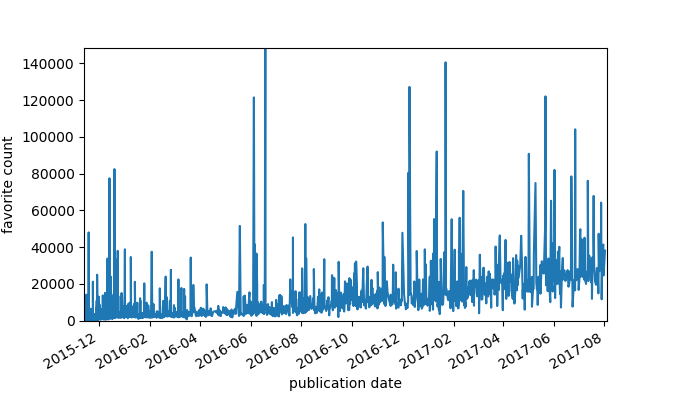

In [12]:
%matplotlib notebook
df.plot.line("timestamp","favorite_count", legend=None)
plt.ylim([0,155000])
plt.xlabel("publication date")
plt.ylabel("favorite count");

By inspecting the plot:

**Insight 1:** The number of favorites a tweet receives is growing on average (baseline). Some tweets receive much more favorites, an indication of the "viralization" of these outliers.

#### 2. Popular dog breeds with most favorites

Relying on the neural network identification of dog breeds, it is possible to identify, between the most common dog breeds, which one receives more "likes", on average.

The main concern when using the data originated from the NN classification algorithm is data accuracy. Thus, in the following, analysis is restricted **only to the cases in which there is more than 50% confidence** on the dog breed.

The second limitation in our analysis is that **only the data from the ten most frequent dog breeds** will be considered. This is to *minimize* (not eliminate) effects of time of publication and outliers.

The first step in the analysis is creating a dataframe that contains only the predictions with more than 50% confidence, `df_confidence50`. Then, the 10 most common dog breeds are selected and the number of favorites grouped by these breeds. Because the data contains very significant outliers, the median is used as a measure of central tendency.  

In [17]:
df_confidence50 = df[df.pred1_confidence >= 0.5]
top10_breeds_counts = df_confidence50.prediction1.value_counts()[0:10]
top10_breeds_counts

golden retriever      116
Pembroke               70
Labrador retriever     65
Chihuahua              47
pug                    43
Samoyed                29
Pomeranian             29
chow                   26
toy poodle             24
French bulldog         21
Name: prediction1, dtype: int64

In [18]:
top10_breeds = top10_breeds_counts.index
# Dataframe with only the top 10 breeds
df_top10 = df_confidence50[df_confidence50.prediction1.isin(top10_breeds)]
top10_fav_counts_median = df_top10.groupby("prediction1").favorite_count.median().sort_values(ascending=False)
top10_fav_counts_median

prediction1
French bulldog        8559.0
golden retriever      7941.0
Pembroke              7289.0
Samoyed               7103.0
Labrador retriever    6661.0
chow                  6487.5
toy poodle            4172.5
Chihuahua             3224.0
Pomeranian            2861.0
pug                   2367.0
Name: favorite_count, dtype: float64

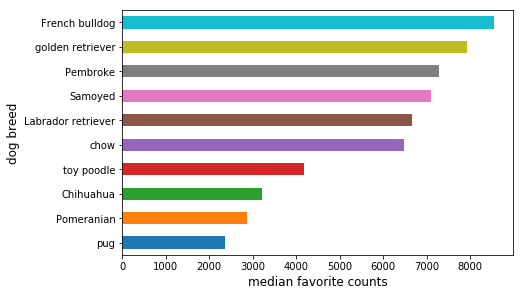

In [19]:
% matplotlib inline
plt.figure(figsize=(7,4.5))
top10_fav_counts_median.sort_values().plot.barh()
plt.xlabel("median favorite counts", fontsize=12)
plt.ylabel("dog breed", fontsize=12);

By the median favorite counts:

**Insight 2:** *After applying our criteria*, French bulldog is the breed with the highest median favorite counts among the ten most common dog breeds. Some breeds (toy poodle, chihuahua, pomeranian and pug) display considerably lower favorite counts.

#### 3. Ratings of popular dog breeds

The Twitter account "WeRateDogs" provides its own "rating" to the dog pictures. Let's visualize the dog breeds that receive the highest average rating.

The same constraints used before are applied, i.e. we are only using data from the breed predictions with more than 50% confidence, and only for the ten most common dog breeds.

As a measure of "rating" we'll use a normalized indicator calculated dividing "rating_numerator" by "rating_denominator". Even though the "ratings" given by the owner of WeRateDogs are somewhat arbitrary, it is possible to make comparisons using the mean of the normalized rating.

In [20]:
df_top10["rating"] = df_top10["rating_numerator"]/df_top10["rating_denominator"]
top10_ratings_mean = df_top10.groupby(df_top10.prediction1).rating.mean().sort_values(ascending=False)
top10_ratings_mean

C:\Users\dmren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


prediction1
Samoyed               1.179310
chow                  1.173077
Pembroke              1.165714
golden retriever      1.155810
toy poodle            1.120833
French bulldog        1.119048
Labrador retriever    1.118462
Pomeranian            1.117241
Chihuahua             1.059574
pug                   1.020930
Name: rating, dtype: float64

In [21]:
# making sure there are no dominant outliers
df_top10.rating.value_counts()

1.200000    142
1.100000    113
1.300000     82
1.000000     82
0.900000     19
0.800000     11
1.400000      9
0.700000      5
0.500000      2
0.300000      1
0.400000      1
0.818182      1
0.600000      1
Name: rating, dtype: int64

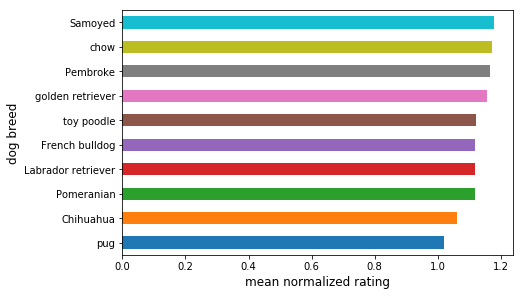

In [22]:
plt.figure(figsize=(7,4.5))
top10_ratings_mean.sort_values().plot.barh()
plt.xlabel("mean normalized rating", fontsize=12)
plt.ylabel("dog breed", fontsize=12);

**Insight 3:** Among the ten most common dog breeds, samoyed, chow-chow, pembroke and golden retriever tend to receive higher ratings from @dog_rates. Chihuahua and pug receive lower rates.

## References

Wes McKinney, *Python for Data Analysis* 2e, O'Reilly, 2018